In [1]:
import os
from utils.configuration import *
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
experiment_name = "api_ordinal_wine_example"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

In [3]:
setup_configuration(experiment_name,EXPERIMENT_DIR)

Configuration already exists/home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/configuration.json


In [4]:
# Load the dataset
wine = load_wine()

df=pd.DataFrame(wine['data'], columns=wine['feature_names'])
df['target']=wine['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [6]:
data_type={key:value for key, value in zip(train_df.columns, ['continous']*13+['ordinal_Xc_Yo'])}
data_type

{'alcohol': 'continous',
 'malic_acid': 'continous',
 'ash': 'continous',
 'alcalinity_of_ash': 'continous',
 'magnesium': 'continous',
 'total_phenols': 'continous',
 'flavanoids': 'continous',
 'nonflavanoid_phenols': 'continous',
 'proanthocyanins': 'continous',
 'color_intensity': 'continous',
 'hue': 'continous',
 'od280/od315_of_diluted_wines': 'continous',
 'proline': 'continous',
 'target': 'ordinal_Xc_Yo'}

In [7]:
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
alcohol              | continous       | continuous [c]                 | continuous [c]                
malic_acid           | continous       | continuous [c]                 | continuous [c]                
ash                  | continous       | continuous [c]                 | continuous [c]                
alcalinity_of_ash    | continous       | continuous [c]                 | continuous [c]                
magnesium            | continous       | continuous [c]                 | continuous [c]                
total_phenols        | continous       | continuous [c]  

/home/bule/TramDag/utils/configuration.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


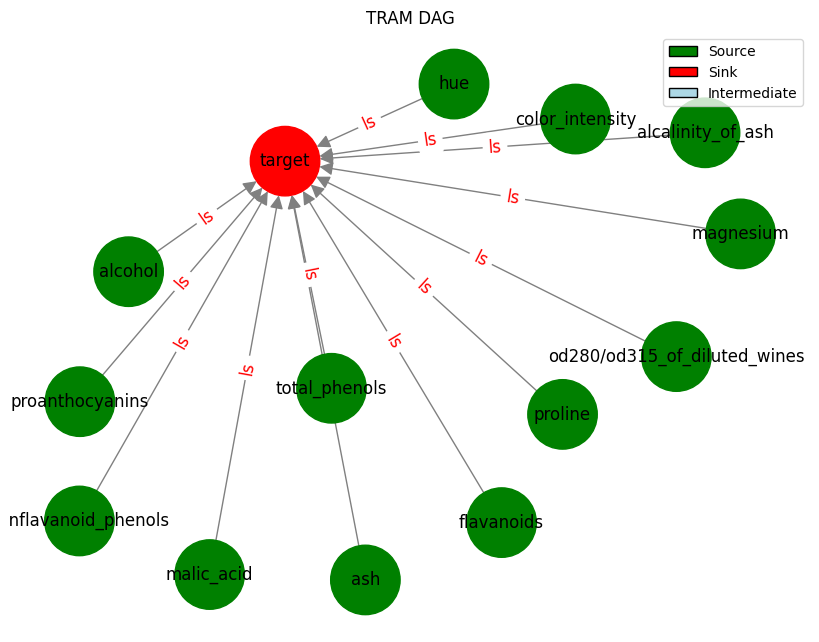

In [8]:
interactive_adj_matrix(CONF_DICT_PATH,seed=19)

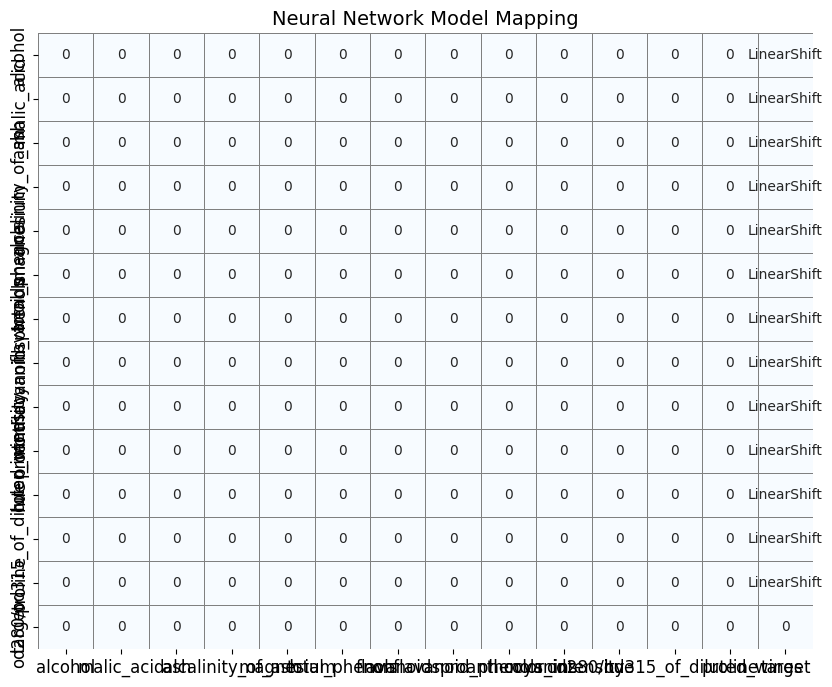

In [9]:
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

In [10]:
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/configuration.json")
cfg.compute_levels(train_df)
device='cpu'

In [11]:
td_model = TramDagModel.from_config(cfg, set_initial_weights=True,verbose=True,debug=True,device=device,initial_data = train_df) 
# 1m52s

[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'alcohol' with settings: {'set_initial_weights': True, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
158    14.34        1.68  2.70               25.0       98.0           2.80   
137    12.53        5.51  2.64               25.0       96.0           1.79   
98     12.37        1.07  2.10               18.5       88.0           3.52   
159    13.48        1.67  2.64               22.5       89.0           2.60   
38     13.07        1.50  2.10               15.5       98.0           2.40   
..       ...         ...   ...                ...        ...            ...   
71     13.86        1.51  2.67               25.0       86.0           2.95   
106    12.25        1.73  2.12               19.0       80.0           1.65   
14     14.38        1.87  2.38               12.0      102.0           3.30   
92     12.69       

In [12]:
td_model.fit(train_df, val_df,
            #  train_list=['target'],
             learning_rate=1e-3,
             epochs=10_000,batch_size=1_0,
             verbose=False,debug=False,
             device=device,
             num_workers = 8,
             persistent_workers = True,
             prefetch_factor = 8,
             train_mode = "parallel")#,

#30 eps 1m 49s seq mode from start 1000 bs
#30 eps 2m 27s parllel multiprocessing mode from start 1000 bs
# 200 eps 9m 30s seq mode from start 1000 bs

[WARNING] 'num_workers' is ignored in parallel mode (disabled to prevent nested multiprocessing).
[WARNING] 'persistent_workers' is ignored in parallel mode (disabled to prevent nested multiprocessing).
[WARNING] 'prefetch_factor' is ignored in parallel mode (disabled to prevent nested multiprocessing).


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  14 | elapsed:  9.0min remaining: 33.1min
[Parallel(n_jobs=10)]: Done   5 out of  14 | elapsed:  9.1min remaining: 16.3min
[Parallel(n_jobs=10)]: Done   7 out of  14 | elapsed:  9.2min remaining:  9.2min
[Parallel(n_jobs=10)]: Done   9 out of  14 | elapsed:  9.2min remaining:  5.1min
[Parallel(n_jobs=10)]: Done  11 out of  14 | elapsed: 17.0min remaining:  4.6min
[Parallel(n_jobs=10)]: Done  14 out of  14 | elapsed: 19.2min finished


In [13]:
rsamples, latents = td_model.sample()

Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/alcohol/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/malic_acid/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/ash/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/alcalinity_of_ash/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/magnesium/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/total_phenols/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/flavanoids/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/nonflavanoid_phenols/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/proanthocyanins/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/a

[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 197.76it/s]



----*----------*-------------*--------Sample Node: malic_acid ------------*-----------------*-------------------*--
[WARNING] target_col 'malic_acid' not in DataFrame columns — is this intended to be used as a Sampler?


[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 202.52it/s]


----*----------*-------------*--------Sample Node: ash ------------*-----------------*-------------------*--
[WARNING] target_col 'ash' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 218.62it/s]


----*----------*-------------*--------Sample Node: alcalinity_of_ash ------------*-----------------*-------------------*--
[WARNING] target_col 'alcalinity_of_ash' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 218.21it/s]


----*----------*-------------*--------Sample Node: magnesium ------------*-----------------*-------------------*--
[WARNING] target_col 'magnesium' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 220.36it/s]


----*----------*-------------*--------Sample Node: total_phenols ------------*-----------------*-------------------*--
[WARNING] target_col 'total_phenols' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 218.80it/s]


----*----------*-------------*--------Sample Node: flavanoids ------------*-----------------*-------------------*--
[WARNING] target_col 'flavanoids' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 217.66it/s]


----*----------*-------------*--------Sample Node: nonflavanoid_phenols ------------*-----------------*-------------------*--
[WARNING] target_col 'nonflavanoid_phenols' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 204.95it/s]


----*----------*-------------*--------Sample Node: proanthocyanins ------------*-----------------*-------------------*--
[WARNING] target_col 'proanthocyanins' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 206.12it/s]


----*----------*-------------*--------Sample Node: color_intensity ------------*-----------------*-------------------*--
[WARNING] target_col 'color_intensity' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 206.53it/s]


----*----------*-------------*--------Sample Node: hue ------------*-----------------*-------------------*--
[WARNING] target_col 'hue' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 220.01it/s]


----*----------*-------------*--------Sample Node: od280/od315_of_diluted_wines ------------*-----------------*-------------------*--
[WARNING] target_col 'od280/od315_of_diluted_wines' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 214.24it/s]


----*----------*-------------*--------Sample Node: proline ------------*-----------------*-------------------*--
[WARNING] target_col 'proline' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:00<00:00, 213.14it/s]


----*----------*-------------*--------Sample Node: target ------------*-----------------*-------------------*--
[WARNING] target_col 'target' not in DataFrame columns — is this intended to be used as a Sampler?


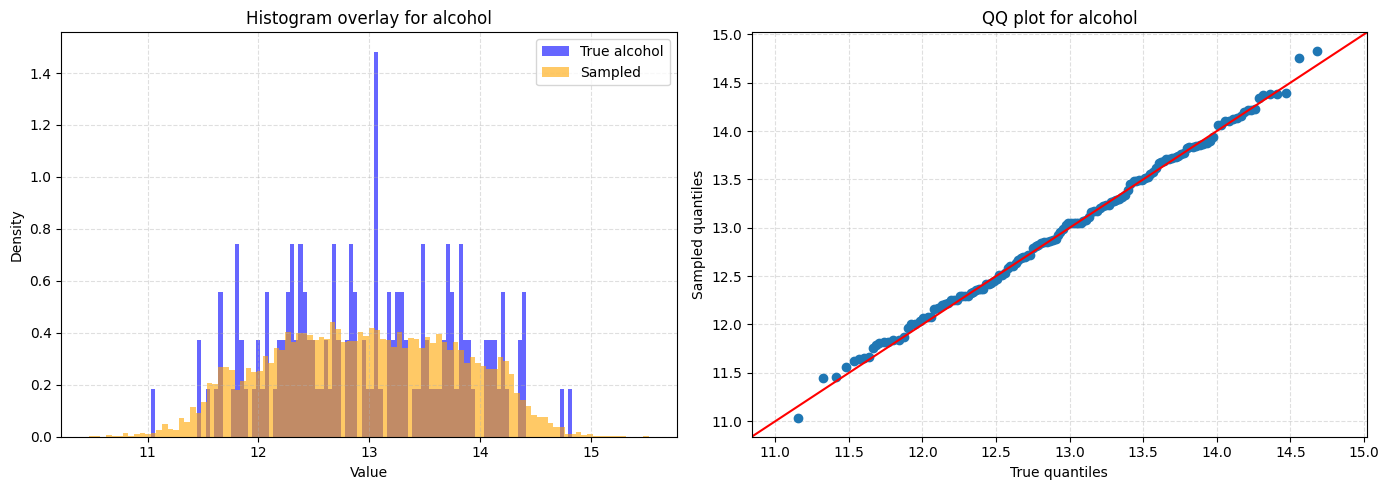

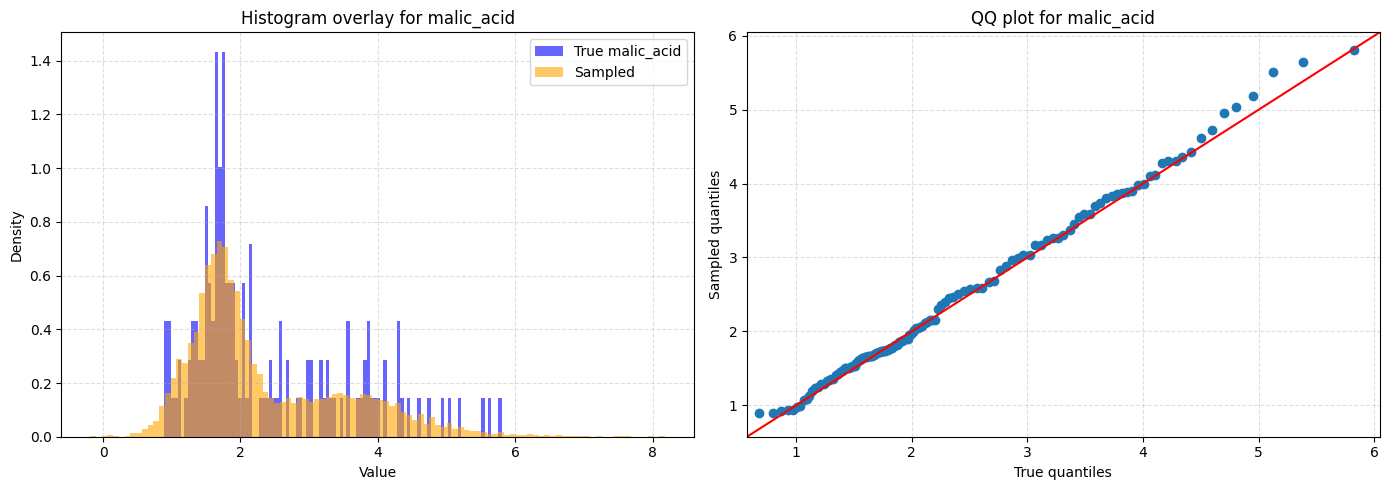

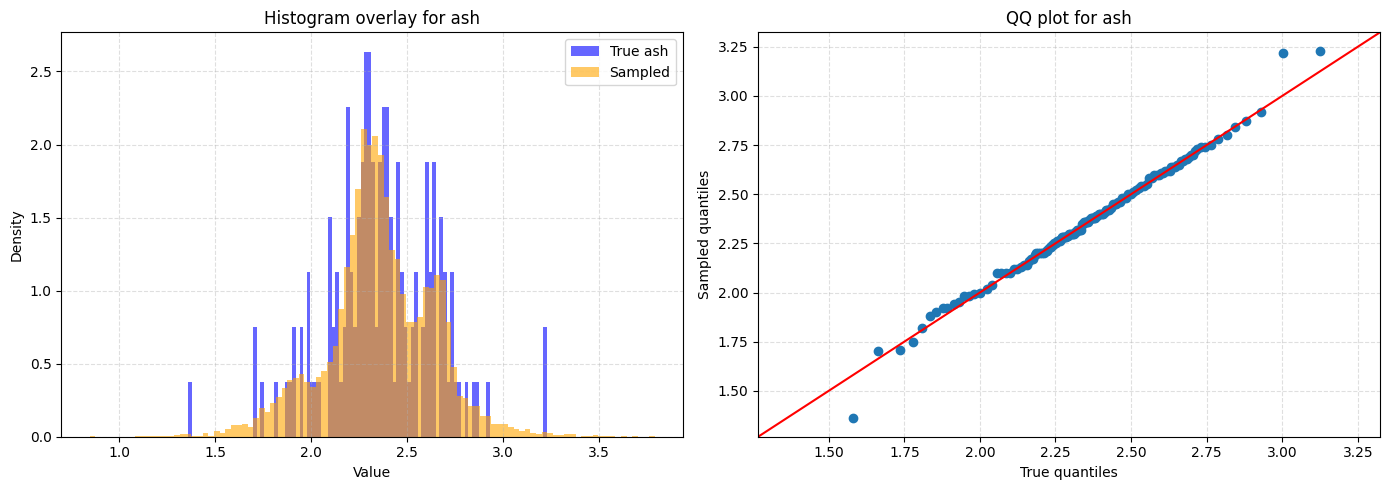

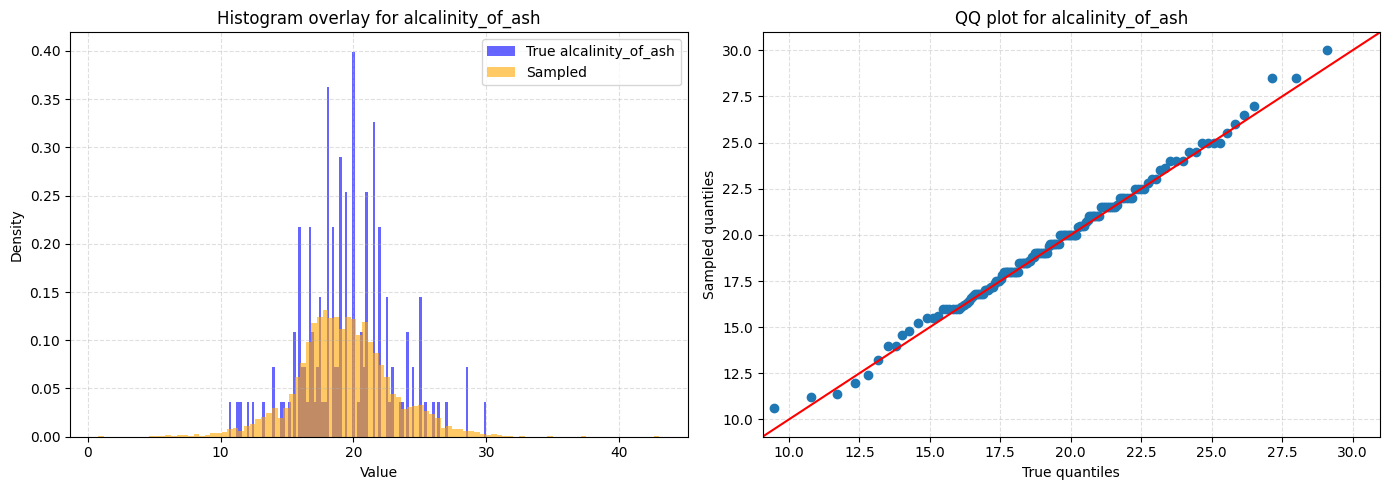

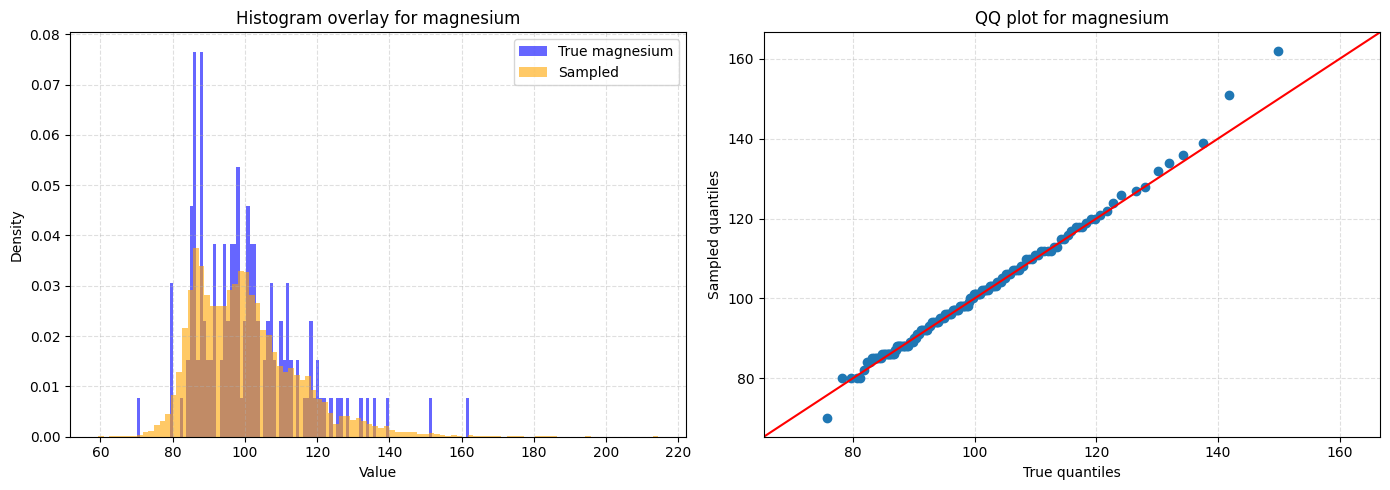

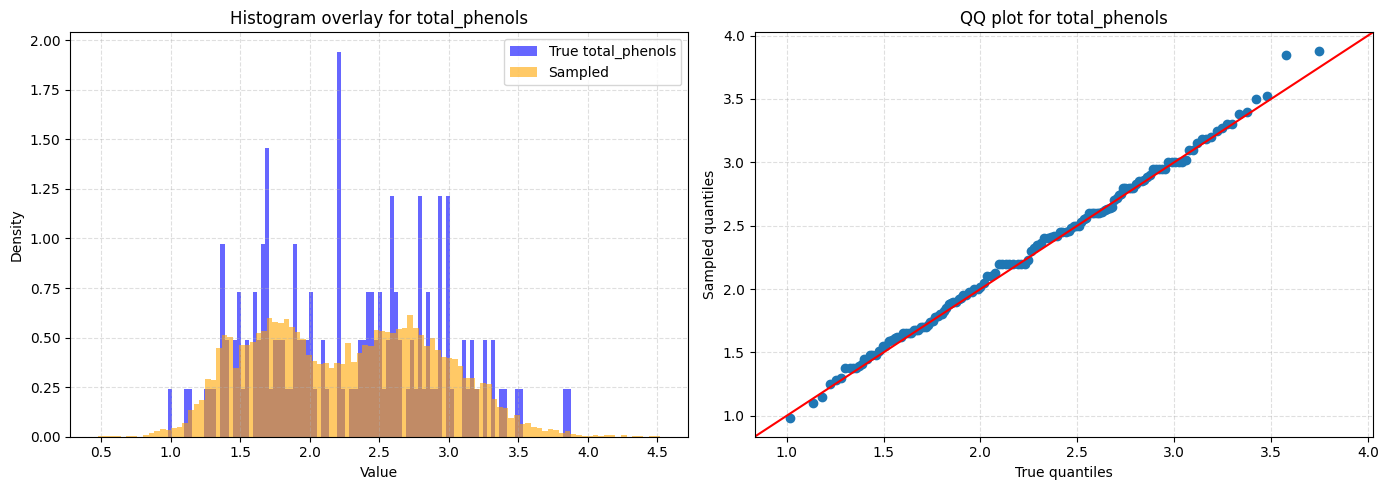

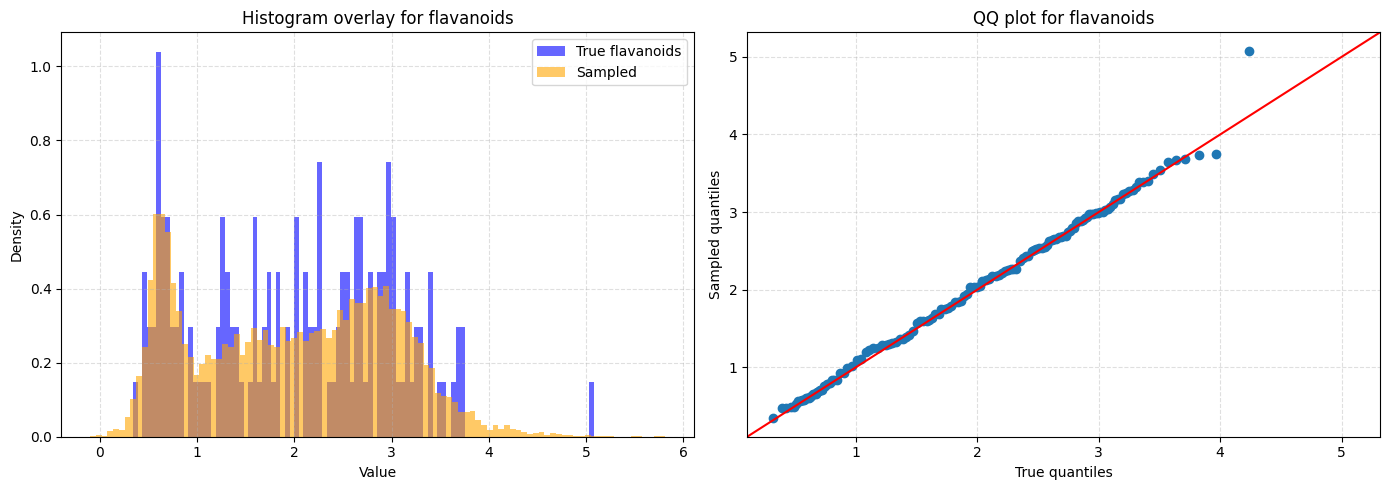

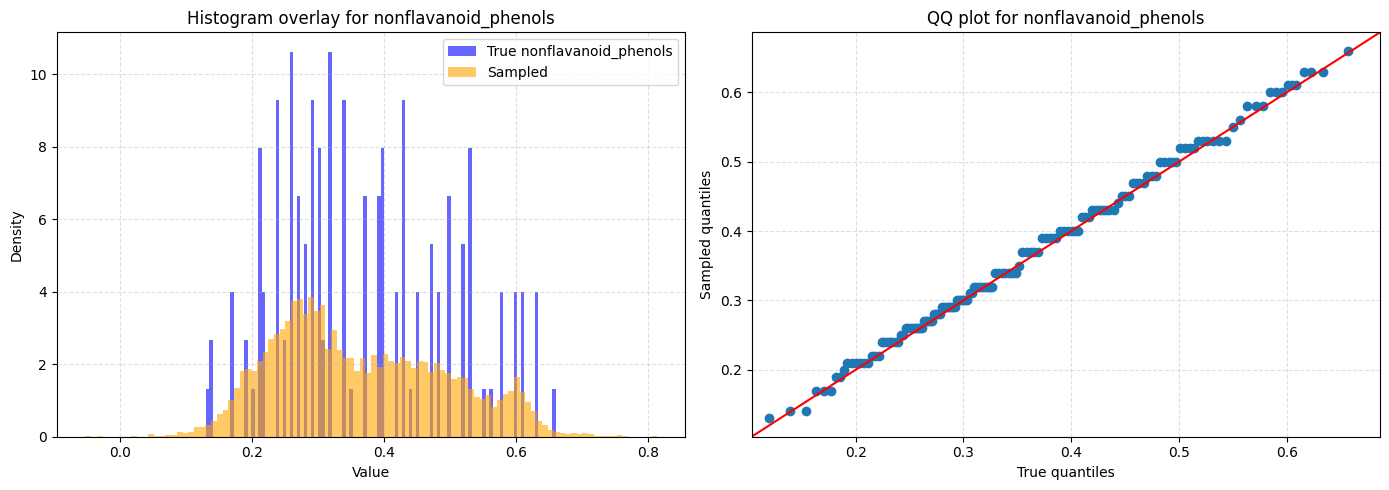

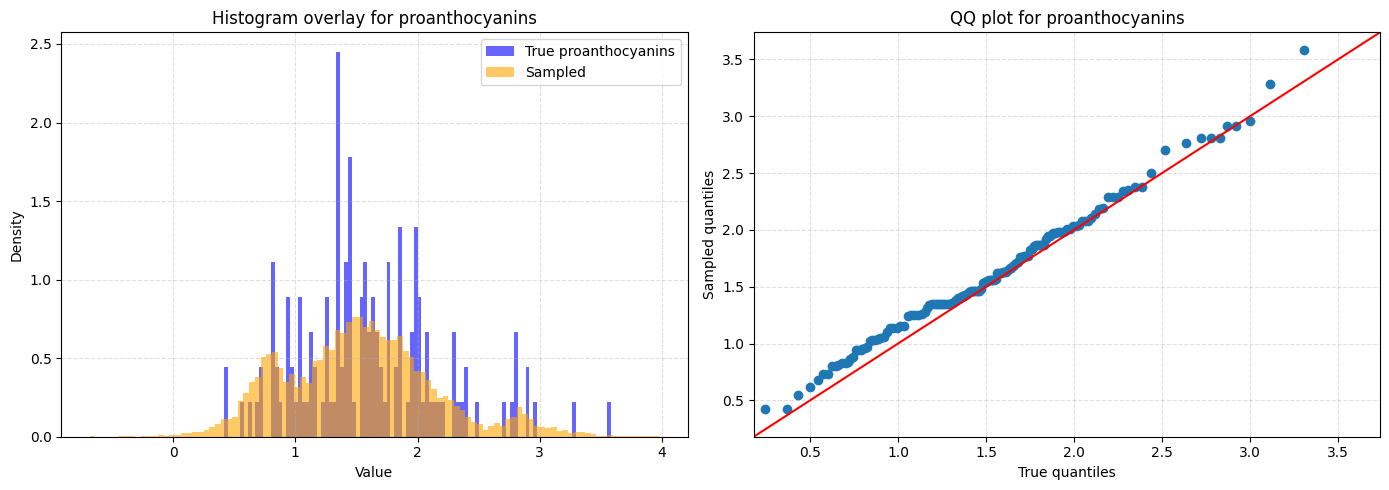

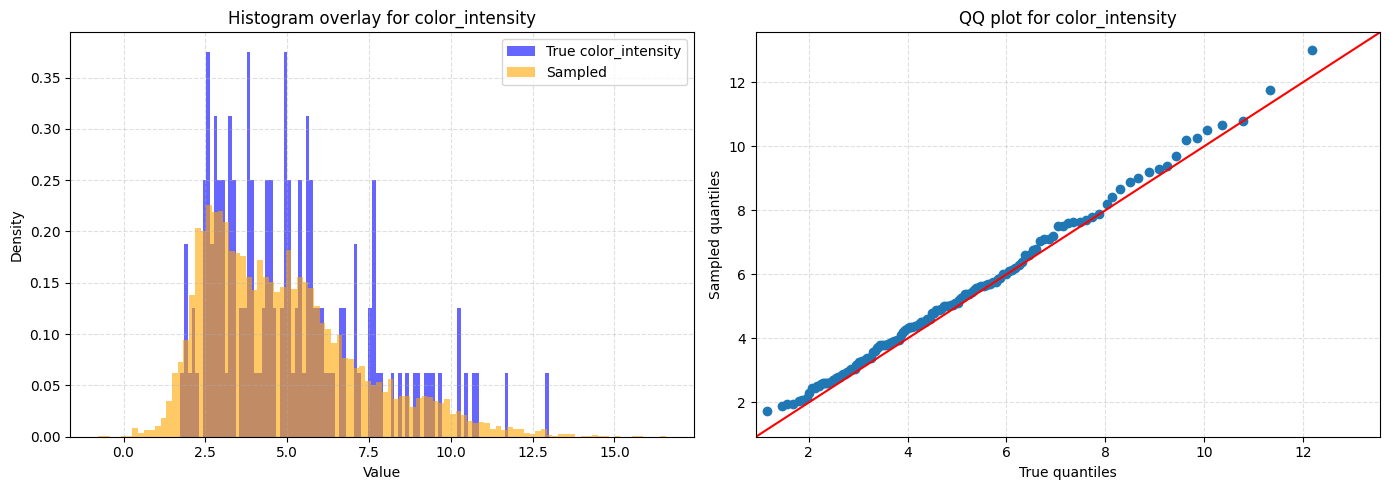

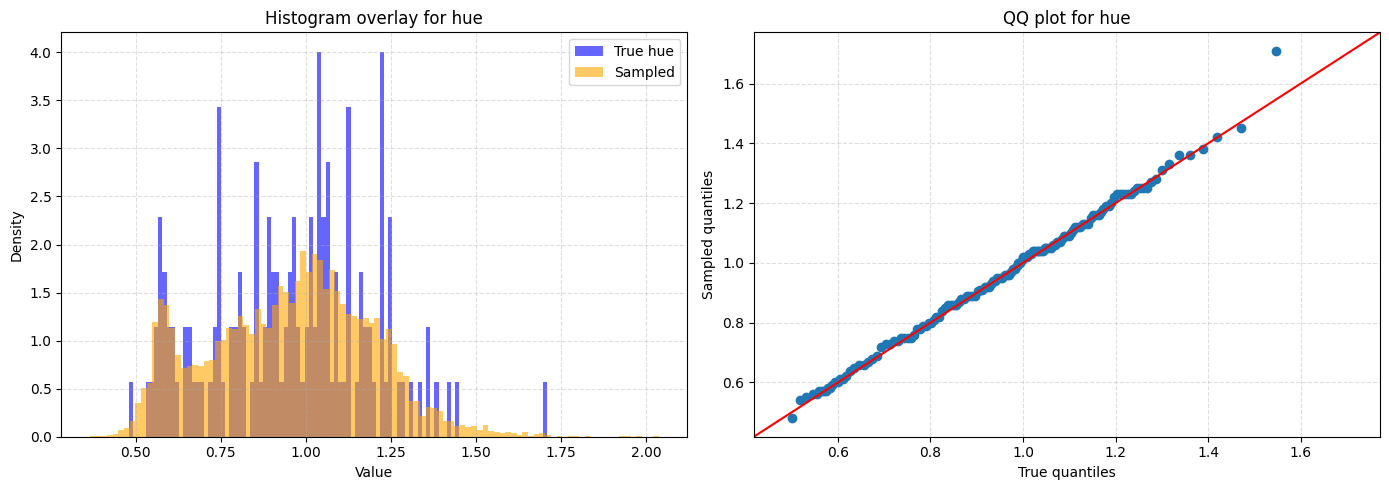

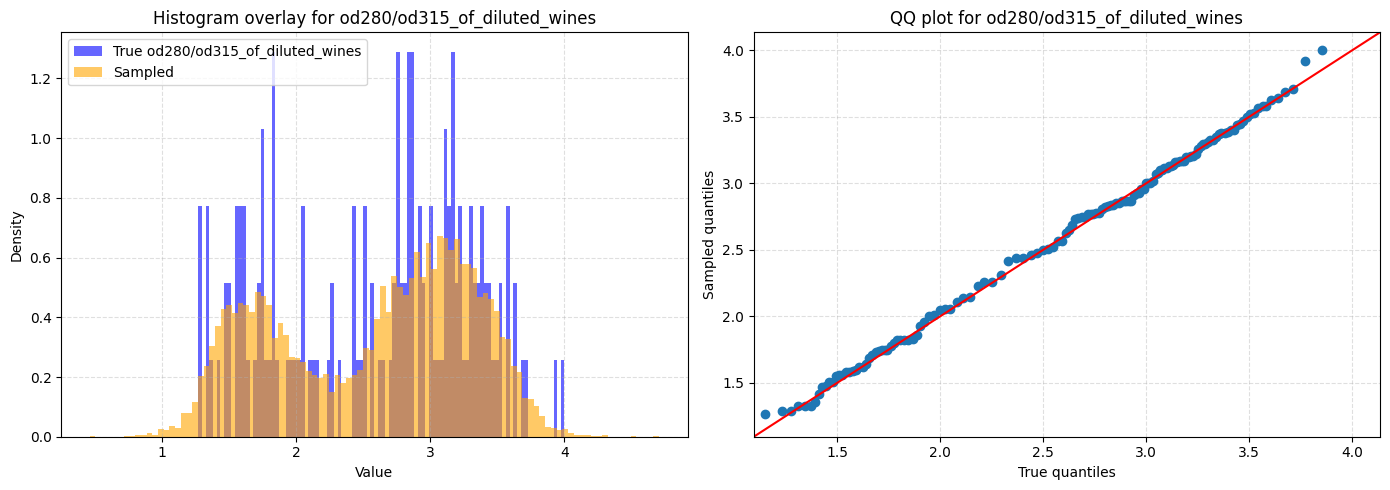

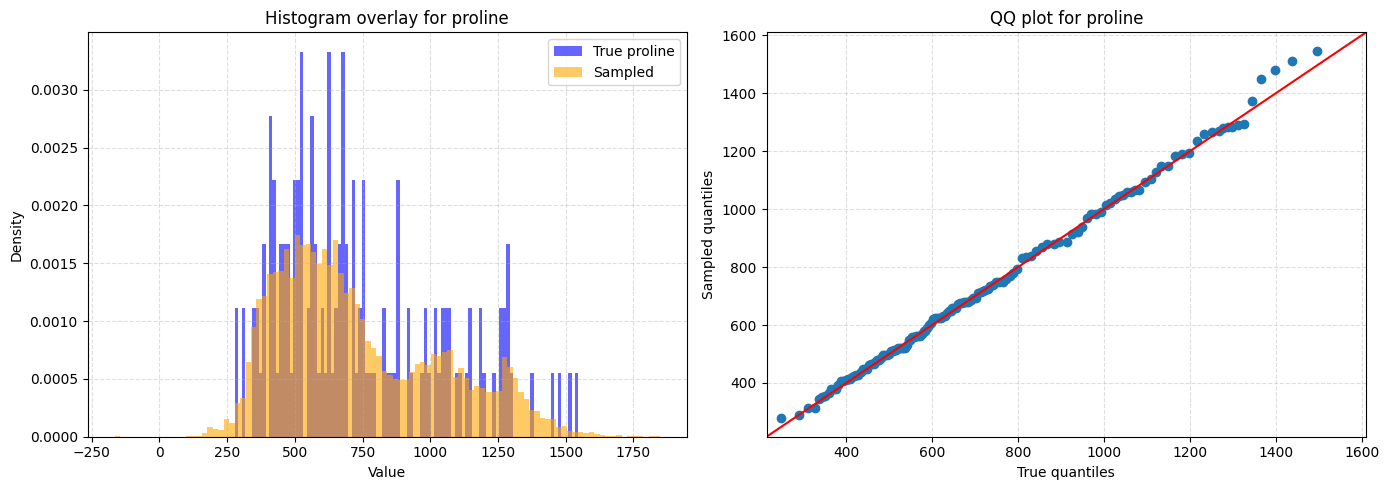

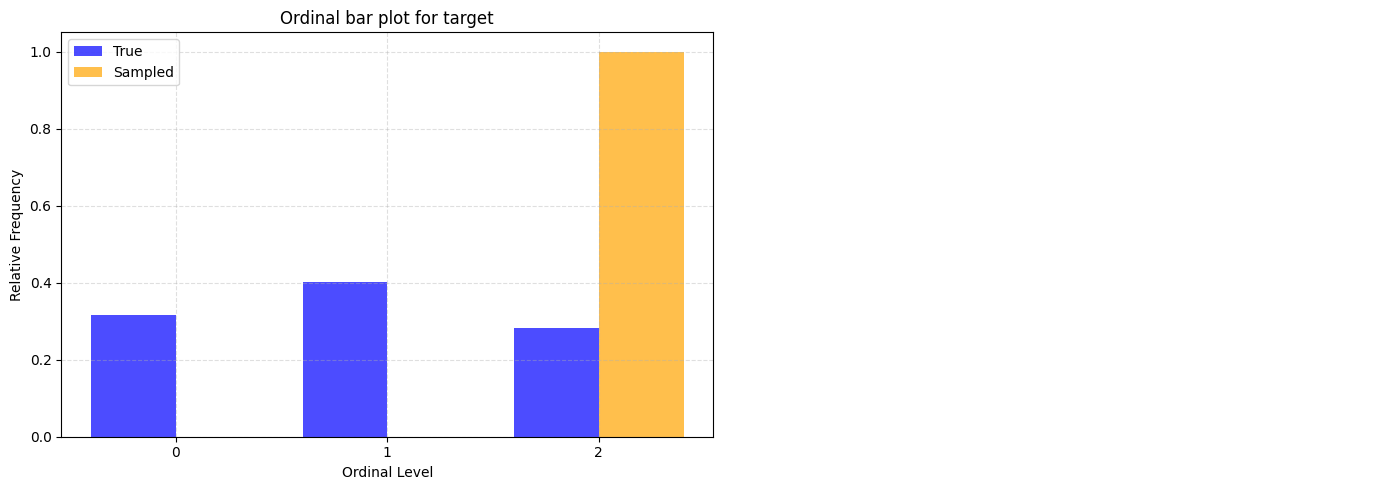

In [14]:
td_model.show_samples_vs_true(train_df)